# Analysing height data, house price and diamond price data with multiple regression
### More generall we may have cases where we assume that the dependent variable depends on more than one independent variable. We handle these cases with *multiple regression*.



* In multiple linear regression we start with the *assumption* that the relationship between the dependent variable $y$ and the independent variables $x_1, x_2, \ldots, x_n$ is of the form:

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$

* In practice, we have a set of observations $y_i$ and $x_{ij}$ and we want to estimate $\alpha$ and $\beta_i$.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

* We will return to the historical example of Galton.

In [2]:
galton_families = sm.datasets.get_rdataset("GaltonFamilies", package="HistData")

galton_families.data

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


* Let's take the sons again, but this time we will examine the relationship of the height of the son to the height of both parents.

In [3]:
parents_sons = galton_families.data[galton_families.data['gender'] == 'male']
parents_sons

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
8,003,75.0,64.0,72.06,2,1,male,71.0
10,004,75.0,64.0,72.06,5,1,male,70.5
...,...,...,...,...,...,...,...,...
918,199,64.0,64.0,66.56,7,2,male,68.0
924,200,64.0,63.0,66.02,1,1,male,64.5
925,201,64.0,60.0,64.40,2,1,male,66.0
929,203,62.0,66.0,66.64,3,1,male,64.0


* To build a model with more than one independent variable, we simply add the variables to the model formula.

In [4]:
parents_sons_mod = smf.ols("childHeight ~ father +  mother", data=parents_sons)
parents_sons_res = parents_sons_mod.fit()
parents_sons_res.params

Intercept    19.312813
father        0.417556
mother        0.328773
dtype: float64

* This means that the relation between the variable `childHeight` ($y$) of the height of the sons and the height of each of the two parents, `father` ($x_1$) and `mother` ($x_2$) is :

$$ y = 19{,}312813 + 0{,}417556 x_1 + 0{,}328773 x_2 $$

* In multiple regression we cannot make a diagram like in simple regression, because we have three dimensions.

* But we can again get a summary of all parameters and regression results with the `summary()` method.

In [5]:
parents_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           6.25e-29
Time:                        17:07:16   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* At this point it is worth returning to the simple regression between fathers and sons.

In [6]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=parents_sons)
fathers_sons_res = fathers_sons_mod.fit()
print('Fathers and sons')
print(fathers_sons_res.params)
print('R-squared:', fathers_sons_res.rsquared)
print('Parents and sons')
print(parents_sons_res.params)
print('R-squared:', parents_sons_res.rsquared)

Fathers and sons
Intercept    38.362581
father        0.446523
dtype: float64
R-squared: 0.1539648084533538
Parents and sons
Intercept    19.312813
father        0.417556
mother        0.328773
dtype: float64
R-squared: 0.23793835969307742


* We notice that $R^2$ has increased significantly. Therefore the linear regression model fits our data best.

* We notice at the same time that the coefficient for the father decreased, when we also took into account the height of the mother.

* This may be because taller women tend to marry taller men, so father's and mother's height are not actually completely independent variables.

* Regarding the interpretation of the coefficients, the coefficient of the `father' variable is the increase in the son's height if the father's height increases by one inch while the mother's height remains constant.

* The interpretation of the `mother' variable coefficient is completely symmetrical.

* Now let's look at a different data set, which is about California home prices.

* Data is from the work of Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

* They are available from https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html.

In [7]:
cal_housing = pd.read_csv('cal_housing.csv')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* It is always a good idea to get a visual view of our data, for example with histograms of each variable.

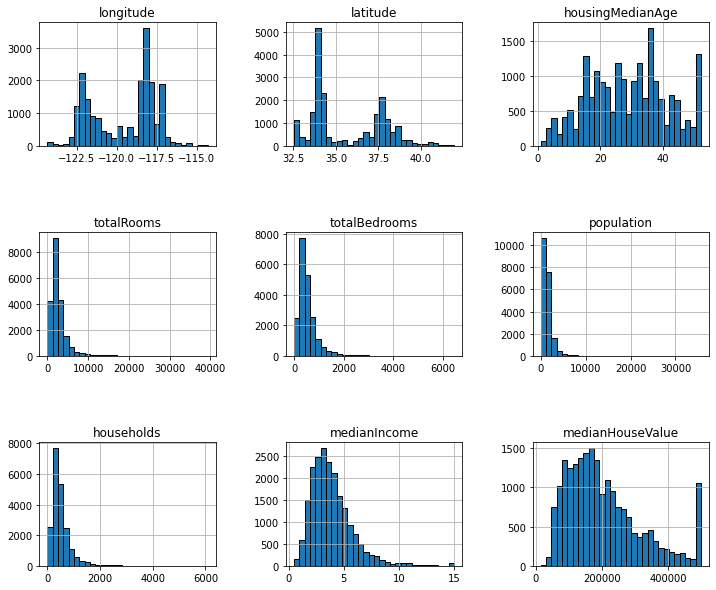

In [8]:
cal_housing.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

* Here we will test a model with the `medianHouseValue` column as the dependent variable, and all other columns as independent variables.

In [9]:
independent_variables = ' + '.join(cal_housing.columns[:-1])
print(independent_variables)
cal_housing_mod = smf.ols("medianHouseValue ~ " + independent_variables, data=cal_housing)

longitude + latitude + housingMedianAge + totalRooms + totalBedrooms + population + households + medianIncome


In [10]:
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4528.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:17   Log-Likelihood:            -2.5941e+05
No. Observations:               20640   AIC:                         5.188e+05
Df Residuals:                   20631   BIC:                         5.189e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.594e+06   6.25e+04    -57.468      0.000   -3.72e+06   -3.47e+06
longitude        -4.282e+04    713.008    -60.061      0.000   -4.42e+04   -4.14e+04
latitude         -4.258e+04    673.257    -63.240      0.000   -4.39e+04   -4.13e+04
housingMedianAge  1156.3039     43.167     26.787      0.000    1071.693    1240.915
totalRooms          -8.1816      0.788    -10.381      0.000      -9.726      -6.637
totalBedrooms      113.4107      6.902     16.432      0.000      99.882     126.939
population         -38.5351      1.079    -35.716      0.000     -40.650     -36.420
households          48.3083      7.515      6.429      0.000      33.579      63.037
medianIncome      4.025e+04    335.060    120.123      0.000    3.96e+04    4.09e+04
==============================================================================
Omnibus:                     4940.460   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18460.080
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       7.007   Cond. No.                     5.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We see that the model has a high $R^2$.

* We also see that the price of the house is affected by its location, as given by longitude and latitude.

* But should we also examine the *interaction* (interaction) of longitude with latitude?

* If we have two independent variables $x_i$ and $x_j$, we can enter their interaction in the model using their product $x_i x_j$.

* In the formulas we give, the syntax `longitude:latitude' means the product of `longitude' and `latitude'.

* The syntax `longitude*latitude` is shorthand for `longitude + latitude + longitude:latitude`.

In [11]:
independent_variables = "housingMedianAge + totalRooms + totalBedrooms + population"
independent_variables += " + households + medianIncome"
independent_variables += " + longitude*latitude"
cal_housing_mod = smf.ols("medianHouseValue ~ " + independent_variables, data=cal_housing)
print(independent_variables)
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

housingMedianAge + totalRooms + totalBedrooms + population + households + medianIncome + longitude*latitude


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4029.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:17   Log-Likelihood:            -2.5940e+05
No. Observations:               20640   AIC:                         5.188e+05
Df Residuals:                   20630   BIC:                         5.189e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.499e+06   7.37e+05     -8.813      0.000   -7.94e+06   -5.05e+06
housingMedianAge    1150.5037     43.177     26.646      0.000    1065.874    1235.134
totalRooms            -8.0558      0.788    -10.217      0.000      -9.601      -6.510
totalBedrooms        112.7774      6.901     16.341      0.000      99.250     126.304
population           -38.8563      1.082    -35.925      0.000     -40.976     -36.736
households            49.1962      7.515      6.546      0.000      34.466      63.927
medianIncome        4.018e+04    335.375    119.810      0.000    3.95e+04    4.08e+04
longitude          -6.701e+04   6158.830    -10.880      0.000   -7.91e+04   -5.49e+04
latitude            3.918e+04   2.07e+04      1.893      0.058   -1377.779    7.97e+04
longitude:latitude   679.9738    172.010      3.953      0.000     342.821    1017.126
==============================================================================
Omnibus:                     4951.461   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18705.892
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       7.044   Cond. No.                     8.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We see that indeed the `longitude:latitude' interaction affects the price of the house.

* At the same time we see that the coefficients of `longitude' and `latitude' have changed as well as the importance coefficient of `latitude'.

* Here the interpretation of the coefficients of the interacting variables needs some attention.

* In essence, the coefficient of `latitude' corresponds to the change in house price when latitude increases by one unit while longitude remains constant *at zero* (and other variables constant).

* In the meantime we have put all the columns inside the model, but they may not have been needed.

* Some columns may be related to others.

* Thus, it is reasonable to assume that the number of rooms is related to the number of bedrooms.

* So let's try removing the number of rooms from our model.

In [12]:
independent_variables = (
    'longitude*latitude',
    'housingMedianAge',
    'totalBedrooms',
    'population',
    'households',
    'medianIncome')
cal_housing_mod = smf.ols("medianHouseValue ~ " + '+'.join(independent_variables), data=cal_housing)
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4497.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:17   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.899e+06   7.38e+05     -9.345      0.000   -8.35e+06   -5.45e+06
longitude          -7.088e+04   6162.552    -11.501      0.000    -8.3e+04   -5.88e+04
latitude            4.611e+04   2.07e+04      2.224      0.026    5470.485    8.68e+04
longitude:latitude   750.9148    172.300      4.358      0.000     413.194    1088.635
housingMedianAge    1176.7594     43.208     27.235      0.000    1092.068    1261.451
totalBedrooms         77.8517      6.010     12.953      0.000      66.071      89.632
population           -41.9652      1.041    -40.332      0.000     -44.005     -39.926
households            53.1893      7.524      7.069      0.000      38.442      67.937
medianIncome        3.814e+04    269.825    141.339      0.000    3.76e+04    3.87e+04
==============================================================================
Omnibus:                     5186.120   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20200.595
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       7.201   Cond. No.                     6.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Let's go back to the home location.

* We can easily make a chart to see if houses with high or low values ​​are clustered somewhere.

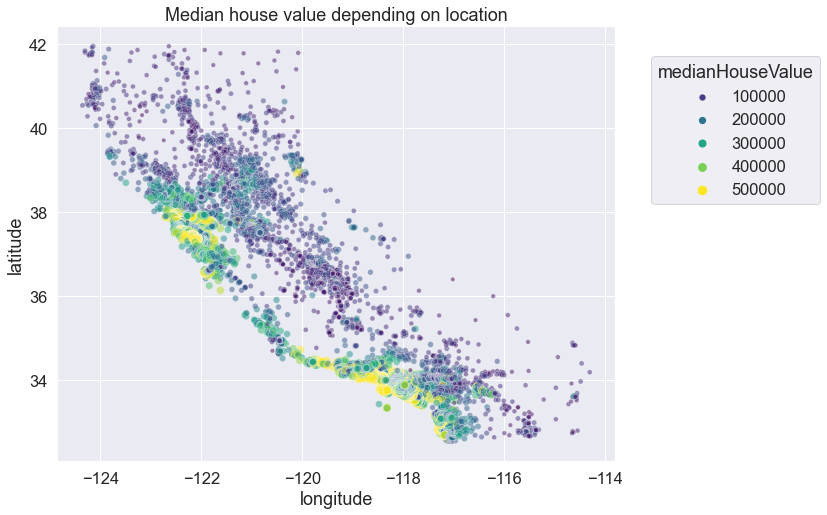

In [18]:
plt.figure(figsize=(10, 8))
sns.set_theme(font_scale=1.5)
sns.scatterplot(data=cal_housing, 
                x="longitude", y="latitude", size="medianHouseValue", hue="medianHouseValue",
                palette="viridis", alpha=0.5)
plt.legend(title="medianHouseValue", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on location")

* Having experienced multiple regression, one thing we will be able to see again is the price of diamonds.

* We had seen that weight affects price, but that clarity, color, and cut also seemed to affect the rest of the price that weight cannot explain.

* So let's look again at the regression we had arrived at.

In [14]:
from plotnine.data import diamonds
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:18   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Now, let's add clarity, color, and cut to the independent variables.

* As these are encoded internally as ordered *categorical variables* (categorical variables*) in pandas, we should get the corresponding integers corresponding to each category.

In [19]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)"
                       + "+ clarity.cat.codes + color.cat.codes + cut.cat.codes", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 6.474e+05
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:57   Log-Likelihood:                 8068.7
No. Observations:               53814   AIC:                        -1.613e+04
Df Residuals:                   53809   BIC:                        -1.608e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.9256      0.003   3815.476      0.000      11.919      11.932
np.log2(carat)        1.8809      0.001   1550.255      0.000       1.879       1.883
clarity.cat.codes     0.1770      0.001    293.925      0.000       0.176       0.178
color.cat.codes      -0.1122      0.001   -203.259      0.000      -0.113      -0.111
cut.cat.codes         0.0456      0.001     55.500      0.000       0.044       0.047
==============================================================================
Omnibus:                     2769.320   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9768.480
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       5.067   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We notice that $R^2$ has increased compared to before.

* Our new model fits the data better.

* And from the coefficients we see that:

 * Clarity positively affects the price of the diamond.
 * The presence of color negatively affects the value of the diamond.
 * The quality of the cut positively affects the price of the diamond.
 * Of course, the weight affects the price much more.